In [ ]:
# -------------------------------
# Assignment 7: Model Evaluation
# -------------------------------

# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename


In [ ]:
# 2. Load Dataset
Tk().withdraw()
filename = askopenfilename(title="Select your CSV file")
data = pd.read_csv(filename)
data.columns = data.columns.str.strip()

# 3. Preprocessing
# Drop non-useful columns if present
columns_to_drop = ['TransactionID', 'TransactionDate']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=columns_to_drop)

# Encode categorical columns
label_encoder = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])

# Identify target (assume last column)
target_column = data.columns[-1]

X = data.drop(target_column, axis=1)
y = data[target_column]

# Fill missing values if any
for col in X.select_dtypes(include='number').columns:
    X[col].fillna(X[col].median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Train Models
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

c:\Users\Maan\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


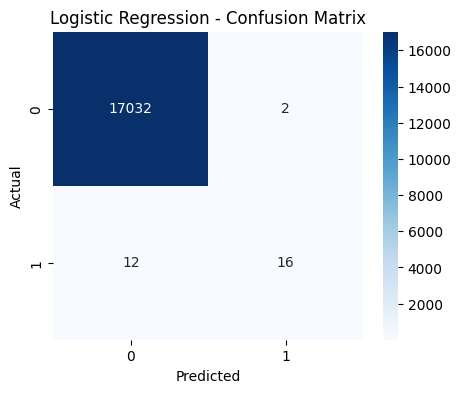

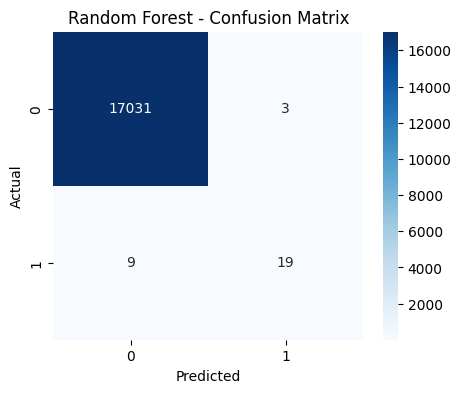


🔹 Logistic Regression Metrics:
Precision: 0.8889
Recall:    0.5714
F1-score:  0.6957

🔹 Random Forest Metrics:
Precision: 0.8636
Recall:    0.6786
F1-score:  0.7600


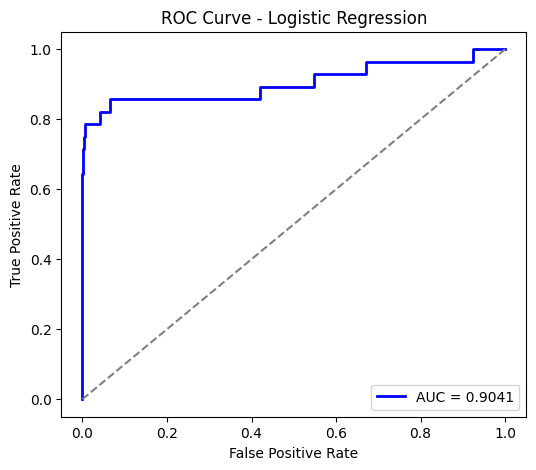

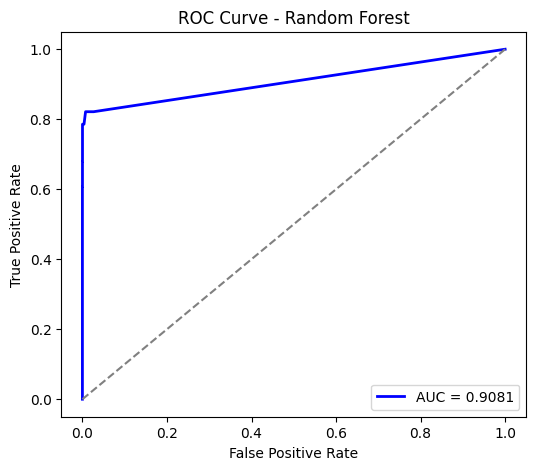

In [ ]:
# 5. Model Evaluation
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression - Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest - Confusion Matrix")

def print_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n🔹 {model_name} Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

print_metrics(y_test, y_pred_lr, "Logistic Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")

def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0,1], [0,1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(logreg, X_test, y_test, "Logistic Regression")
plot_roc_curve(rf, X_test, y_test, "Random Forest")

### Reflection on Evaluation Metrics

For my credit card fraud detection project, **Recall is the most important metric**, 
because missing a fraudulent transaction could lead to financial loss. 
Precision is also important to avoid too many false alarms, but in this project, 
the cost of missing fraud is higher than the cost of false positives. 
F1-score provides a balanced view of both Precision and Recall, 
but for our business context, Recall takes priority.

**Chosen final evaluation metric:** Recall